In [2]:
!pip install spotpy
import spotpy
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from scipy.interpolate import make_interp_spline, BSpline
from scipy import interpolate

from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 194kB 13.8MB/s 
Mounted at /content/gdrive


FileNotFoundError: ignored

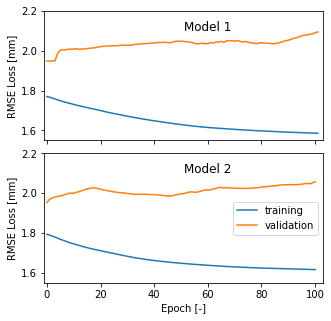

In [53]:
data_model_1 = np.load('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/training_convlstm_history/my_history.npy', allow_pickle=True).item()

data_model_2 = np.load('/content/gdrive/MyDrive/rainfall-forecast/merge_model/ConvLSTM/training_convlstm_history/history_2nd_model.npy', allow_pickle=True).item()


def smoothing(data, weight = 0.9):
    scalar = data
    last = scalar[0]
    smoothed_list = []
    for point in scalar:
        smoothed_value = last*weight + (1-weight) *point
        smoothed_list.append(smoothed_value)
        last = smoothed_value
    return smoothed_list

model_1_train_loss = smoothing(data_model_1['loss'])
model_1_val_loss = smoothing(data_model_1['val_mse'])

model_1_train_loss = np.sqrt(ss_1_train_loss)
model_1_val_loss = np.sqrt(ss_1_val_loss)

model_2_train_loss = smoothing(data_model_2['loss'])
model_2_val_loss = smoothing(data_model_2['val_mse'])

model_2_train_loss = np.sqrt(s_2_train_loss)
model_2_val_loss = np.sqrt(s_2_val_loss)


fig, (ax1, ax2) = plt.subplots(2, figsize=(5,5), sharex=True)
plt.subplots_adjust(hspace =0.1)

# plt.style.use('ggplot')
ax1.plot(model_1_train_loss, label='training')
ax1.plot(model_1_val_loss, label='validation')
plt.legend()

ax2.plot(model_2_train_loss, label='training')
ax2.plot(model_2_val_loss, label='validation')
ax1.set_ylabel('RMSE Loss [mm]')
ax2.set_ylabel('RMSE Loss [mm]')
ax2.set_xlabel('Epoch [-]')

ax1.set_xlim(-1,103)
ax1.set_ylim(1.55, 2.2)
ax2.set_ylim(1.55, 2.2)

plt.legend()
plt.text(0.5, 0.85, 'Model 1', fontsize = 12, transform = ax1.transAxes)
plt.text(0.5, 0.85, 'Model 2', fontsize = 12, transform = ax2.transAxes)


plt.savefig("/home/robert/Desktop/test.png",bbox_inches='tight')

In [31]:
data_model_1

array({'loss': [9.82719612121582, 9.114434242248535, 8.798545837402344, 8.686565399169922, 8.511309623718262, 8.535407066345215, 8.45523452758789, 8.468103408813477, 8.492607116699219, 8.385750770568848, 8.294879913330078, 8.259485244750977, 8.229605674743652, 8.239025115966797, 8.133035659790039, 8.081881523132324, 8.029541969299316, 8.037209510803223, 7.980356216430664, 7.859620094299316, 7.782154083251953, 7.743738174438477, 7.680397987365723, 7.6451215744018555, 7.624932289123535, 7.572376251220703, 7.545522212982178, 7.509854793548584, 7.459272861480713, 7.397973537445068, 7.3580522537231445, 7.337973594665527, 7.307056427001953, 7.263947010040283, 7.23192024230957, 7.2005133628845215, 7.16196870803833, 7.132830619812012, 7.1039958000183105, 7.061333656311035, 7.043866157531738, 7.052617073059082, 6.9945244789123535, 6.961874008178711, 6.93075704574585, 6.908907890319824, 6.864772796630859, 6.840217590332031, 6.832437038421631, 6.807011127471924, 6.780310153961182, 6.7770824432373

In [39]:
data_model_1

{'loss': [9.82719612121582,
  9.114434242248535,
  8.798545837402344,
  8.686565399169922,
  8.511309623718262,
  8.535407066345215,
  8.45523452758789,
  8.468103408813477,
  8.492607116699219,
  8.385750770568848,
  8.294879913330078,
  8.259485244750977,
  8.229605674743652,
  8.239025115966797,
  8.133035659790039,
  8.081881523132324,
  8.029541969299316,
  8.037209510803223,
  7.980356216430664,
  7.859620094299316,
  7.782154083251953,
  7.743738174438477,
  7.680397987365723,
  7.6451215744018555,
  7.624932289123535,
  7.572376251220703,
  7.545522212982178,
  7.509854793548584,
  7.459272861480713,
  7.397973537445068,
  7.3580522537231445,
  7.337973594665527,
  7.307056427001953,
  7.263947010040283,
  7.23192024230957,
  7.2005133628845215,
  7.16196870803833,
  7.132830619812012,
  7.1039958000183105,
  7.061333656311035,
  7.043866157531738,
  7.052617073059082,
  6.9945244789123535,
  6.961874008178711,
  6.93075704574585,
  6.908907890319824,
  6.864772796630859,
  6.8